GM =  [2.1]
PM =  [60.1] rad
wB =  [0.036]
wC =  [0.054]
wBT =  [1.]
w180 =  [0.458]
Ms =  1.93
Mt =  1.0
rise time =  31.0 s


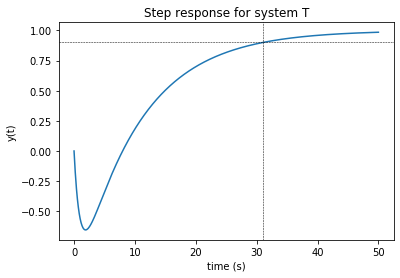

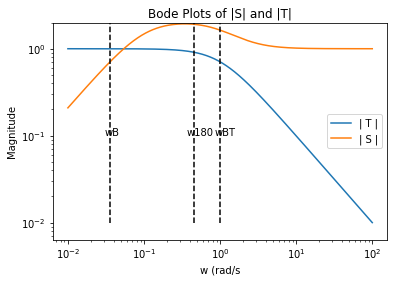

In [2]:
from __future__ import print_function
from utils import tf, marginsclosedloop, margins, tf_step, maxpeak
import matplotlib.pyplot as plt
import utilsplot
import numpy as np

s = tf([1,0], 1)
z = 0.1
tau = 1

L = (-s + z)/(s*(tau*s + tau*z + 2))
T = (-s + z)/((s + z)*(tau*s + 1))
S = 1/(1 + L)

mT = maxpeak(T)
mS = maxpeak(S)
GM, PM, wc, wb, wbt, valid = marginsclosedloop(L)
GM, PM, wc, w_180 = margins(L)
print('GM = ', np.round(GM, 1))
print('PM = ', np.round(PM, 1), 'rad')
print('wB = ', np.round(wb, 3))
print('wC = ', np.round(wc, 3))
print('wBT = ', wbt)
print('w180 = ', np.round(w_180, 3))
print('Ms = ', np.round(mS, 2))
print('Mt = ', np.round(mT, 1))

[t, y] = tf_step(T, 50)
plt.figure('Figure 2.17')
plt.title('Step response for system T')
plt.plot(t, y)
plt.xlabel('time (s)')
plt.ylabel('y(t)')
# Calculate rise time tr
y90 = y[y<=0.9]
tr = t[len(y90)]
print('rise time = ',np.round(tr, 1) ,'s')
plt.axhline(0.9, color='black', linestyle='--',linewidth=0.5)
plt.axvline(tr, color='black', linestyle='--',linewidth=0.5)
plt.show()

w = np.logspace(-2, 2, 1000)
s = 1j*w
gain_T = np.abs(T(s))
gain_S = np.abs(S(s))

plt.figure('Figure 2.18')
plt.title('Bode Plots of |S| and |T|')
plt.loglog(w, gain_T)
plt.loglog(w, gain_S)
yrange = np.logspace(-2, 2)
plt.loglog(wb*np.ones(len(yrange)), yrange, 'k--')
plt.loglog(wbt*np.ones(len(yrange)), yrange, 'k--')
plt.loglog(w_180*np.ones(len(yrange)), yrange, 'k--')
plt.legend(["| T |", "| S |"])
plt.xlabel('w (rad/s')
plt.ylabel('Magnitude')
plt.text(wb-0.005, 10**(-1), 'wB')
plt.text((wbt-0.15), 10**(-1), 'wBT')
plt.text((w_180-0.1), 10**(-1), 'w180')
plt.ylim([-2, 2])
plt.show()
